In [ ]:
#\Project:
    1. Business case
    2. Importing basic libraries
    3. Load the data
    4. Domain Analysis
    5. Basic Checks
    6. EDA
        a. univariate analysis
        b. bivariate analysis
        c.Multivariate analysis
    7. Data Preprocessing
        a. scaling
        b. Balancing
        c. Encoding
        d. Handling null values
        e. outliers Handling
         
    8.  Feature Engineering [Feature selection, Feature extraction]
    9.  Splitting the data
        a.train and test split
    10. Model implementation
    11. Model Evaluation
    12. Hyperparameter tuning
    13. Model comparison report
    14. Challenges Faced
    15. Conclusion\

# 1. Business Case

 #### Based on the given features we need to predict the blood group
    

# 2. Importing Basic Libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 3. Load the data

In [19]:
main_data = pd.read_csv('Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
main_data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [20]:
data = main_data.copy()
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


# 4. Domain Analysis

# 5. Basic Checks 

In [21]:
data.shape

(576, 6)

In [22]:
data.head(5)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [23]:
data.tail(5)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [25]:
data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


# 6. Exploratory Data Analysis

In [26]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html

                                             |                                             | [  0%]   00:00 ->…

<bound method DataframeReport.show_html of <sweetviz.dataframe_report.DataframeReport object at 0x000001898D671190>>

In [28]:
report.show_html

<bound method DataframeReport.show_html of <sweetviz.dataframe_report.DataframeReport object at 0x000001898D671190>>

# a. Univariate Analysis

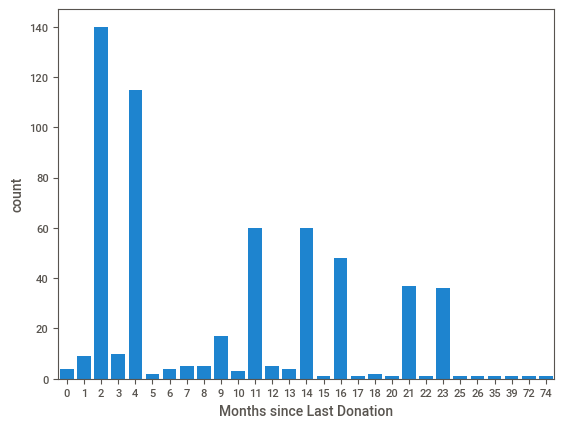

In [29]:
sns.countplot( x = 'Months since Last Donation',data = data)
plt.show()

# Insights

In [ ]:
#